# 1. Numpy: Tutorial
## 1.1 dot, einsum
### dot

In [2]:
import numpy as np

In [2]:
a = np.array([[1,2],[3,4]])
b = a

print(np.dot(a,b))

[[ 7 10]
 [15 22]]


In [3]:
a=4

print(np.dot(a,a))

16


In [4]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(24).reshape((2,4,3))
print(np.dot(a,b).shape)

(2, 3, 2, 3)


In [5]:
a = np.arange(6).reshape((3,2,1))
b = np.arange(6).reshape((3,1,2))

print(np.dot(a,b).shape)

(3, 2, 3, 2)


In [6]:
a = np.arange(16).reshape((2,2,4))
b = np.arange(16).reshape((2,4,2))
print(np.dot(a,b).shape)

(2, 2, 2, 2)


### einsum

In [7]:
# Transpose

A = np.array([[1,2,3], [4,5,6]])
R = np.einsum("ij->ji", A)
print(R)

[[1 4]
 [2 5]
 [3 6]]


In [8]:
# diagonal, Trace

A = np.eye(10)
print(A)
diag = np.einsum('ii->i', A)
trace =np.einsum('ii->', A)
print(diag)
print(trace)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10.0


In [9]:
# matrix sum to scalar

A = np.array([[1,2,3], [4,5,6]])
R = np.einsum("ij->", A)
print(R)

21


In [10]:
# matrix column or row sum (to vector)

A = np.array([[1,2,3], [4,5,6]])
row_sum = np.einsum("ij->i", A)
col_sum =np.einsum("ij->j", A)
print(row_sum)
print(col_sum)

[ 6 15]
[5 7 9]


In [11]:
# Dot Product, Outer product of two vectors

x = np.array([-1, -10, -100])
y = np.array([1, 10, 100])
dot = np.einsum('i,i->', x, y ) # dot product
outer = np.einsum('i,j->ij', x,y) # outer product
print(dot)
print(outer)

-10101
[[    -1    -10   -100]
 [   -10   -100  -1000]
 [  -100  -1000 -10000]]


In [12]:
# Hadamard(element-wise) product of vector or matrix

x = np.array([-1, -10, -100])
y = np.array([1, 10, 100])
elemwise_vec = np.einsum('i,i->i', x, y)
print(elemwise_vec)
A = np.arange(6).reshape((2, 3))
B = np.arange(6).reshape((2, 3))
elemwise_mat = np.einsum('ij,ij->', A, B)
print(elemwise_mat)

[    -1   -100 -10000]
55


In [13]:
# Matrix-Vector multiplication

A = np.array([[1,2,3], [4,5,6]])
x = np.array([-1, -10, -100])
b = np.einsum('ij,j->i', A, x)
print(b)

## Matrix-Matrix Multiplication
A = np.array([[1,2,3], [4,5,6]])
b = A.transpose()
R = np.einsum('ik,kj->ij', A, b)
print(R)

## Batched Matrix Multiplication
A = np.random.random(size=(3,2,1))
B = np.random.random(size=(3,1,2))

R = np.einsum('bik,bkj->bij',A, B)
print(R)
print(R.shape)

[-321 -654]
[[14 32]
 [32 77]]
[[[0.40298129 0.59043898]
  [0.0739351  0.10832802]]

 [[0.24378779 0.07427415]
  [0.4942785  0.15059046]]

 [[0.06461978 0.14414622]
  [0.24197069 0.53975978]]]
(3, 2, 2)


In [14]:
x = np.array([1,2,3])
y = np.array([-1,-2,-3])
A = np.random.random(size=(3, 3))

r = np.einsum('i,ij,j->', x, A, y)

print(r)

-18.550454732519377


## 1.2 quiz풀이

In [15]:
# 72. How to swap two rows of an array? (★★★)

A = np.arange(25).reshape(5,5)
print(A)
A[[0,1]] = A[[1,0]]
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [16]:
# 69. How to get the diagonal of a dot product? (★★★)

A = np.arange(9).reshape((3,3))
B = np.arange(9).reshape((3,3))

np.einsum("ij,ji->i", A, B)

array([ 15,  54, 111])

In [17]:
# 74. Given an array C that is a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

C = np.bincount([1,1,2,3,4,4,6])
A = np.repeat(np.arange(len(C)), C)
print(A)

[1 1 2 3 4 4 6]


In [18]:
# 83. How to find the most frequent value in an array? (★★★)
Z = np.random.randint(0,10,50)
print(Z)
print(np.bincount(Z).argmax())

[6 2 4 5 8 8 7 0 0 6 6 6 5 1 9 4 0 1 6 1 8 8 6 1 9 9 7 9 2 9 4 9 4 7 6 1 5
 4 3 5 3 7 9 0 0 4 7 0 3 9]
9


In [19]:
# 89. How to get the n largest values of an array (★★★)

Z = np.arange(10000)
np.random.shuffle(Z)
n = 11

print (Z[np.argsort(Z)[-n:]])

[9989 9990 9991 9992 9993 9994 9995 9996 9997 9998 9999]


## 1.3 선형방정식 풀기

In [3]:
from numpy.linalg import inv
# Ax = b 풀기

A = np.arange(4).reshape((2,2))
b = np.arange(6).reshape((2,3))

print(np.dot(np.linalg.inv(A),b))

# pseudo inverse 이용

A = np.arange(10).reshape((2,5))
b = np.arange(6).reshape((2,3))

print(np.dot(np.linalg.pinv(A),b))

[[ 1.5  0.5 -0.5]
 [ 0.   1.   2. ]]
[[ 3.60000000e-01  1.60000000e-01 -4.00000000e-02]
 [ 2.40000000e-01  1.40000000e-01  4.00000000e-02]
 [ 1.20000000e-01  1.20000000e-01  1.20000000e-01]
 [-4.16333634e-17  1.00000000e-01  2.00000000e-01]
 [-1.20000000e-01  8.00000000e-02  2.80000000e-01]]


# 2. Linear regression

## 데이터셋 만들고 저장

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

## 데이터셋 만들고 저장

w = 20*np.random.rand(1,100)-10 
b = 20*np.random.rand(1)-10

x = 20*np.random.rand(10000,100,1)-10
y = np.matmul(w,x)

x=np.squeeze(x, axis=2)
y=np.squeeze(y, axis=2)+b

print(w.shape)
print(b.shape)

print(x.shape)
print(y.shape)



# pickle 이용해 저장

with open("linear/myrandomdataset_w.pickle","wb") as fw:
    pickle.dump(w, fw)
with open("linear/myrandomdataset_b.pickle","wb") as fw:
    pickle.dump(b, fw)
with open("linear/myrandomdataset_x.pickle","wb") as fw:
    pickle.dump(x, fw)
with open("linear/myrandomdataset_y.pickle","wb") as fw:
    pickle.dump(y, fw)

(1, 100)
(1,)
(10000, 100)
(10000, 1)


(10000, 1)


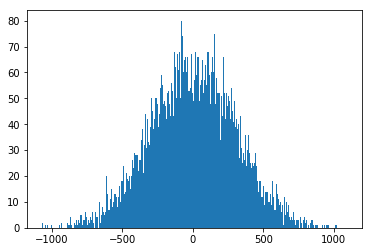

In [5]:
print(y.shape)
plt.figure
plt.hist(y, 444)
plt.show()

In [6]:
from numpy import random

#배치 뽑는 함수

def get_mini_batches(X, y, batch_size): 
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs,:]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for
                   i in range(0, len(y), batch_size)]
    return mini_batches

In [7]:
# pickle 이용해 읽기

with open("linear/myrandomdataset_w.pickle","rb") as fr:
    w_ = pickle.load(fr)
with open("linear/myrandomdataset_b.pickle","rb") as fr:
    b_ = pickle.load(fr)
with open("linear/myrandomdataset_x.pickle","rb") as fr:
    x_ = pickle.load(fr)
with open("linear/myrandomdataset_y.pickle","rb") as fr:
    y_ = pickle.load(fr)

In [8]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [9]:
a_=diabetes['data']
b_ =np.expand_dims(diabetes['target'], axis=1)

print(a_.shape)
print(b_.shape)

(442, 10)
(442, 1)


In [10]:
d_size = 1000 #deafult   N=1000
if(x_.shape[0]==10000): # N의 사이즈에 따른 설정 (1000, 10000, 100000 중 택 1)
    d_size=10000
elif(x_.shape[0]==100000):
    d_size=100000
elif(x_.shape[0]==442):
    d_size=442
    
# 학습용데이터
train_x = x_[0:int(d_size*0.85)]
train_y = y_[0:int(d_size*0.85)]

# dev 데이터
dev_x = x_[int(d_size*0.85):int(d_size*0.9)]
dev_y = y_[int(d_size*0.85):int(d_size*0.9)]

# test 데이터
test_x = x_[int(d_size*0.9):d_size]
test_y = y_[int(d_size*0.9):d_size]

print(test_x.shape)
print(test_y.shape)

(1000, 100)
(1000, 1)


In [11]:
#파라미터 설정

epochs = 100 # 최대 에폭
learning_rate = 0.01
batch_size = 300
dimension = 100
max_data = train_x.shape[0]

W = np.zeros((dimension,1))
b = 0

train_batch = get_mini_batches(train_x, train_y, batch_size)[0] 

train_batch_x= train_batch[0]
train_batch_y= train_batch[1]

print(train_batch_x.shape)
print(train_batch_y.shape)


(300, 100)
(300, 1)


In [12]:
# train, test

dev_temp = 0

for i in range(epochs):
    for j in range(int(max_data/batch_size)):    
        gradient_w =  np.dot(np.transpose(train_batch_x), (np.dot(train_batch_x,W) + b - train_batch_y ))* 2 / batch_size
        gradient_b =  np.sum((np.dot(train_batch_x,W) + b - train_batch_y )* 2) / batch_size

        W -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
    
        hypothesis = np.dot(train_batch_x,W) + b
        Loss = np.sum((hypothesis - train_batch_y) ** 2) / batch_size

    train_hypothesis = np.dot(train_x,W) + b
    train_Loss = np.sum((train_hypothesis - train_y) ** 2) / d_size*0.1
        
    dev_hypothesis = np.dot(dev_x,W) + b
    dev_Loss = np.sum((dev_hypothesis - dev_y) ** 2) / d_size*0.1
    
    test_hypothesis = np.dot(test_x,W) + b
    test_Loss = np.sum((test_hypothesis - test_y) ** 2) / d_size*0.1
    
    w_squared_error = np.sum((W-np.transpose(w_))** 2) / dimension
    b_squared_error = np.sum(abs(b-b_))
    
    print('Epoch  {:d}\n[Train Loss]  {:f}'.format(i+1, train_Loss))
    print('[Dev Loss]  {:f}'.format(np.sum(dev_Loss)))
    print('[Test Loss]  {:f}'.format(np.sum(test_Loss)))
    print('w squared error : {:f} , b squared error : {:f}'.format(w_squared_error, b_squared_error))
    print()

    if(dev_temp != 0 and (dev_temp - dev_Loss<0 or dev_temp - dev_Loss<0.00000001)):
        print("Early Stopping !")
        break

    dev_temp = test_Loss

Epoch  1
[Train Loss]  0.830723
[Dev Loss]  0.051400
[Test Loss]  0.105754
w squared error : 0.001198 , b squared error : 67230.262372

Epoch  2
[Train Loss]  0.404180
[Dev Loss]  0.025010
[Test Loss]  0.051898
w squared error : 0.000574 , b squared error : 67553.424400

Epoch  3
[Train Loss]  0.198504
[Dev Loss]  0.012282
[Test Loss]  0.025494
w squared error : 0.000282 , b squared error : 67779.833377

Epoch  4
[Train Loss]  0.097497
[Dev Loss]  0.006033
[Test Loss]  0.012521
w squared error : 0.000138 , b squared error : 67938.507506

Epoch  5
[Train Loss]  0.047886
[Dev Loss]  0.002963
[Test Loss]  0.006150
w squared error : 0.000068 , b squared error : 68049.710542

Epoch  6
[Train Loss]  0.023520
[Dev Loss]  0.001455
[Test Loss]  0.003021
w squared error : 0.000033 , b squared error : 68127.644567

Epoch  7
[Train Loss]  0.011552
[Dev Loss]  0.000715
[Test Loss]  0.001484
w squared error : 0.000016 , b squared error : 68182.262791

Epoch  8
[Train Loss]  0.005674
[Dev Loss]  0.00

# 3. Logistic regression

In [10]:
from sklearn import datasets
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [11]:
y =np.expand_dims(y, axis=1)

In [12]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000, 1)


In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y)
y= enc.transform(y).toarray()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
# 데이터 섞어주기 위해 셔플

tmp = [[a,b] for a, b in zip(X, y)]
import random

random.shuffle(tmp)

X = [n[0] for n in tmp]
y = [n[1] for n in tmp]

X = np.asarray(X)
y = np.asarray(y)

In [15]:
d_size = 70000 


# 학습용데이터
train_x = X[0:int(d_size*0.85)]
train_y = y[0:int(d_size*0.85)]

# dev 데이터
dev_x = X[int(d_size*0.85):int(d_size*0.9)]
dev_y = y[int(d_size*0.85):int(d_size*0.9)]

# test 데이터
test_x = X[int(d_size*0.9):d_size]
test_y = y[int(d_size*0.9):d_size]

(2000, 784)
(2000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


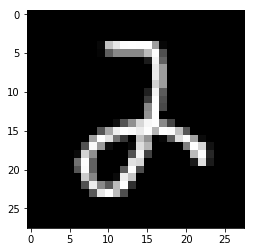

In [16]:
#파라미터 설정

epochs = 100 #최대에폭
learning_rate = 0.01
batch_size = 2000
dimension = 784
max_data = train_x.shape[0]

W = np.random.normal(loc=0.0, 
                        scale = np.sqrt(2/(dimension+10)), 
                        size = (dimension,10))
b = 0

train_batch = get_mini_batches(train_x, train_y, batch_size)[0] 

train_batch_x= train_batch[0]
train_batch_y= train_batch[1]

print(train_batch_x.shape)
print(train_batch_y.shape)

print(train_batch_y[42])
plt.imshow(train_batch_x[42].reshape((28, 28)), cmap='gray')

In [17]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition

In [18]:
# train, test

dev_temp = 0

for i in range(epochs):
    for j in range(int(max_data/batch_size)):   
        
        gradient_w =  np.dot(np.transpose(train_batch_x), (softmax(np.dot(train_batch_x,W) + b) - train_batch_y ))/d_size
        gradient_b =  np.sum((np.dot(train_batch_x,W) + b - train_batch_y )* 2) /d_size

        W -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    train_hypothesis = softmax(np.dot(train_x,W) + b)
    train_est = np.argmax(train_hypothesis, axis=1) - np.argmax(train_y, axis=1)
    train_Loss = np.sum((train_hypothesis - train_y) ** 2) / d_size*0.1
    train_acc= len(np.where(train_est==0)[0])/int(d_size*0.85)*100
    
    dev_hypothesis = softmax(np.dot(dev_x,W) + b)
    dev_est = np.argmax(dev_hypothesis, axis=1) - np.argmax(dev_y, axis=1)
    dev_Loss = np.sum((dev_hypothesis - dev_y) ** 2) / d_size*0.1
    dev_acc = len(np.where(dev_est==0)[0])/int(d_size*0.05)*100
    
    test_hypothesis = softmax(np.dot(test_x,W) + b)
    test_est = np.argmax(test_hypothesis, axis=1) - np.argmax(test_y, axis=1)
    test_Loss = np.sum((test_hypothesis - test_y) ** 2) / d_size*0.1
    test_acc = len(np.where(test_est==0)[0])/int(d_size*0.1)*100
    
    
    print('Epoch  {:d}'.format(i+1))
    print('[Train]  Loss : {:f}    Acc :  {:.4f}'.format(np.sum(train_Loss), train_acc))
    print('[Dev]  Loss : {:f}    Acc :  {:.4f}'.format(np.sum(dev_Loss), dev_acc))
    print('[Test]  Loss : {:f}    Acc :  {:.4f}'.format(np.sum(test_Loss), test_acc))
    print()

    if(abs(dev_acc-dev_temp)<0.0001):
        print("Early Stopping !")
        break
    
    if((i+1)%5==0):
        dev_temp = dev_acc

Epoch  1
[Train]  Loss : 0.051543    Acc :  69.0235
[Dev]  Loss : 0.003160    Acc :  67.8571
[Test]  Loss : 0.006131    Acc :  68.7857

Epoch  2
[Train]  Loss : 0.042092    Acc :  74.6975
[Dev]  Loss : 0.002596    Acc :  73.4571
[Test]  Loss : 0.005113    Acc :  73.9000

Epoch  3
[Train]  Loss : 0.038152    Acc :  77.0168
[Dev]  Loss : 0.002315    Acc :  76.4286
[Test]  Loss : 0.004586    Acc :  76.5143

Epoch  4
[Train]  Loss : 0.035922    Acc :  78.3630
[Dev]  Loss : 0.002180    Acc :  77.7143
[Test]  Loss : 0.004433    Acc :  77.1857

Epoch  5
[Train]  Loss : 0.034810    Acc :  79.0269
[Dev]  Loss : 0.002132    Acc :  78.2571
[Test]  Loss : 0.004264    Acc :  78.1429

Epoch  6
[Train]  Loss : 0.034199    Acc :  79.3933
[Dev]  Loss : 0.002108    Acc :  78.4571
[Test]  Loss : 0.004211    Acc :  78.4429

Epoch  7
[Train]  Loss : 0.033628    Acc :  79.7109
[Dev]  Loss : 0.002024    Acc :  79.3143
[Test]  Loss : 0.004122    Acc :  78.8857

Epoch  8
[Train]  Loss : 0.033408    Acc :  79.8

# 4. Multi-layer perceptron (MLP)

In [1]:
import numpy as np
from sklearn import datasets
from collections import OrderedDict

X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
y =np.expand_dims(y, axis=1)

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y)
y= enc.transform(y).toarray()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
# 데이터 섞어주기 위해 셔플

tmp = [[a,b] for a, b in zip(X, y)]
import random

random.shuffle(tmp)

X = [n[0] for n in tmp]
y = [n[1] for n in tmp]

X = np.asarray(X)
y = np.asarray(y)

In [5]:
d_size = 70000 


# 학습용데이터
train_x = X[0:int(d_size*0.85)]
train_y = y[0:int(d_size*0.85)]

# dev 데이터
dev_x = X[int(d_size*0.85):int(d_size*0.9)]
dev_y = y[int(d_size*0.85):int(d_size*0.9)]

# test 데이터
test_x = X[int(d_size*0.9):d_size]
test_y = y[int(d_size*0.9):d_size]

In [6]:
def normalize(x):
    x = x.astype(np.float32)
    x /= 255.0
    return x

In [7]:
train_x = normalize(train_x)
dev_x = normalize(dev_x)
test_x = normalize(test_x)

In [8]:
print(train_x.shape)
print(train_y.shape)
print(dev_x.shape)
print(dev_y.shape)
print(test_x.shape)
print(test_y.shape)

(59500, 784)
(59500, 10)
(3500, 784)
(3500, 10)
(7000, 784)
(7000, 10)


In [9]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

In [10]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [11]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
def cross_entropy_error(y, t): # negative log likelihood
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [13]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [14]:
class MLP:
    def __init__(self, layers_size, weight_init_std = 0.01):
        
        temp = len(layers_size)-2 # 히든 레이어 갯수
        self.temp = temp
        # 가중치 초기화
        self.params = {}
        
        self.params['W1'] = weight_init_std * np.random.randn(layers_size[0], layers_size[1])
        self.params['b1'] = np.zeros(layers_size[1])
        
        for i in range(temp):
            self.params['W'+str(i+2)] = weight_init_std * np.random.randn(layers_size[i+1], layers_size[i+2])
            self.params['b'+str(i+2)] = np.zeros(layers_size[i+2])
            

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        for i in range(temp):
            self.layers['Relu'+str(i+1)] = Relu()
            self.layers['Affine'+str(i+2)] = Affine(self.params['W'+str(i+2)], self.params['b'+str(i+2)])
           
        self.lastLayer = SoftmaxWithLoss()

    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers: #역전파
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        
        for i in range(self.temp):
            grads['W'+str(i+2)], grads['b'+str(i+2)] = self.layers['Affine'+str(i+2)].dW, self.layers['Affine'+str(i+2)].db
        return grads


In [15]:
# 파라미터 설정

#network = MLP([784,50,10]) # input(784고정) - [hidden] - output(10고정: 10개로 분류)
#network = MLP([784,50,50,10])
network = MLP([784,50,50,50,10])
#network = MLP([784,50,50,50,50,10])

iters_num = 10000000
train_size = train_x.shape[0]
batch_size = 500
learning_rate = 0.5
iter_per_epoch = max(train_size / batch_size, 1)
max_epoch = 100 # default = 100

In [20]:
wb_arrange = ['W1', 'b1']
tem=1
dev_temp=0
for i in range(network.temp):
    wb_arrange.append('W'+str(i+2))
    wb_arrange.append('b'+str(i+2))
    
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_x[batch_mask]
    t_batch = train_y[batch_mask]
    
    # backpropa
    grad = network.gradient(x_batch, t_batch)
    
    # update
    for key in wb_arrange:
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    
    
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(train_x, train_y)
        dev_acc = network.accuracy(dev_x, dev_y)
        test_acc = network.accuracy(test_x, test_y)
        
        train_loss = network.loss(train_x, train_y)
        dev_loss = network.loss(dev_x, dev_y)
        test_loss = network.loss(test_x, test_y)
        print('Epoch  {:d}'.format(tem))
        print('[Train]  Loss : {:f}    Acc :  {:.4f}'.format(train_loss, train_acc*100))
        print('[Dev]  Loss : {:f}    Acc :  {:.4f}'.format(dev_loss, dev_acc*100))
        print('[Test]  Loss : {:f}    Acc :  {:.4f}'.format(test_loss, test_acc*100))
        print()
        
        if tem==max_epoch:
            break        
        tem=tem+1
        
        
        if(abs(dev_acc*100-dev_temp)<0.2):
            print("Early Stopping !")
            break

        dev_temp = dev_acc*100

Epoch  1
[Train]  Loss : 2.301284    Acc :  11.1916
[Dev]  Loss : 2.299928    Acc :  11.8286
[Test]  Loss : 2.301620    Acc :  11.4857

Epoch  2
[Train]  Loss : 2.273938    Acc :  23.6437
[Dev]  Loss : 2.272735    Acc :  24.2571
[Test]  Loss : 2.275435    Acc :  23.2286

Epoch  3
[Train]  Loss : 1.832531    Acc :  29.0655
[Dev]  Loss : 1.827142    Acc :  29.6571
[Test]  Loss : 1.834598    Acc :  28.2286

Epoch  4
[Train]  Loss : 0.968142    Acc :  62.4639
[Dev]  Loss : 0.964119    Acc :  62.8571
[Test]  Loss : 0.970620    Acc :  62.3571

Epoch  5
[Train]  Loss : 0.356292    Acc :  90.7395
[Dev]  Loss : 0.355561    Acc :  90.8000
[Test]  Loss : 0.352757    Acc :  90.8714

Epoch  6
[Train]  Loss : 0.247245    Acc :  93.2538
[Dev]  Loss : 0.259978    Acc :  93.2857
[Test]  Loss : 0.255517    Acc :  92.9571

Epoch  7
[Train]  Loss : 0.197712    Acc :  94.6672
[Dev]  Loss : 0.214880    Acc :  94.5714
[Test]  Loss : 0.205054    Acc :  94.5143

Epoch  8
[Train]  Loss : 0.167026    Acc :  95.2

In [21]:
# pickle 이용해 저장
import pickle

for i in wb_arrange:
    with open("MLP/MLP_mnist_"+i+".pickle","wb") as fw:
        pickle.dump(network.params[i], fw)

In [22]:
# 불러온 파라미터를 집어넣을 새 모델 생성(layers 의 갯수와 size를 맞게 설정해야된다.)
network2 = MLP([784,50,50,50,10])

In [23]:
# pickle 이용해 불러오기

for i in range(network2.temp+1):
    with open("MLP/MLP_mnist_"+'W'+str(i+1)+".pickle","rb") as fw:
        with open("MLP/MLP_mnist_"+'b'+str(i+1)+".pickle","rb") as fb:
            network2.layers['Affine'+str(i+1)] = Affine(pickle.load(fw), pickle.load(fb))

In [24]:
# 불러온 학습된 모델을 통해 테스트(테스트셋에서)

acc = network2.accuracy(test_x, test_y)
loss = network2.loss(test_x, test_y)

print('Loss : {:f}    Acc :  {:.4f}'.format(loss, acc*100))

Loss : 0.172935    Acc :  95.2857
